In [49]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.cluster import DBSCAN

In [50]:
#jwddf = pd.read_csv('D:/data/sun/dbscan/jwd_all.csv')
jwddf = pd.read_csv('D:/data/sun/dbscan/out1.csv')
jwddf_groupby = jwddf.groupby(by = 'xq_code')
xq_codes = list(jwddf_groupby.groups.keys())

In [51]:
def showAllPointImage(jwd,xq_code):
    plt.scatter(jwd['pre_night_longitude'], jwd['pre_night_latitude'], c="red", marker='.', label=xq_code) 
    plt.xlabel('longitude')  
    plt.ylabel('latitude')  
    plt.legend(loc=2)  
    plt.show() 
    
def showCalPointImage(test_df,xq_code):
    plt.scatter(test_df['pre_night_longitude'], test_df['pre_night_latitude'], c="red", marker='.', label=xq_code) 
    plt.xlabel('longitude')  
    plt.ylabel('latitude')  
    plt.legend(loc=2)  
    plt.show() 
    
def showClusterImage(core_member,non_core_member,noise_member,n_clusters_):
    plt.plot(core_member['pre_night_longitude'], core_member['pre_night_latitude'], '+', markersize=6)
    plt.plot(non_core_member['pre_night_longitude'], non_core_member['pre_night_latitude'], '^', markersize=6)
    plt.plot(noise_member['pre_night_longitude'], noise_member['pre_night_latitude'], '.', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
    
def showMemberImage(xy,xq_code):
    plt.scatter(xy['pre_night_longitude'], xy['pre_night_latitude'], c="red", marker='.', label=xq_code) 
    plt.xlabel('longitude')  
    plt.ylabel('latitude')  
    plt.legend(loc=2)  
    plt.show() 
    
def calMedian(jwd):
    longitude_zws = jwd['pre_night_longitude'].median()
    latitude_zws = jwd['pre_night_latitude'].median()
    return longitude_zws,latitude_zws
    
def calMean(jwd):
    longitude_pjs = jwd['pre_night_longitude'].mean()
    latitude_pjs = jwd['pre_night_latitude'].mean()
    return longitude_pjs,latitude_pjs

def filterExcepValues(jwd,xq_code):
    longitude_zws,latitude_zws = calMedian(jwd)
    test_df = jwd[(jwd.pre_night_longitude > longitude_zws - 0.025) &
        (jwd.pre_night_longitude < longitude_zws + 0.025) &
        (jwd.pre_night_latitude > latitude_zws - 0.025) &
        (jwd.pre_night_latitude < latitude_zws + 0.025)]
    
    excep_num = jwd.shape[0] - test_df.shape[0]
    print('xq_code：',xq_code ,':全部数据点：',jwd.shape[0],'个：可用数据点：',test_df.shape[0],'个：异常数据点:',excep_num,'个')
    return test_df

def dbscan(test_df,eps1,min_samples1):
    db = DBSCAN(eps=eps1, min_samples=min_samples1).fit(test_df[['pre_night_longitude','pre_night_latitude']])
    #db = DBSCAN(eps=0.001, min_samples=20).fit(test_df[['pre_night_longitude','pre_night_latitude']])
    labels = db.labels_
    #计算簇个数
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    return db,n_clusters_,labels

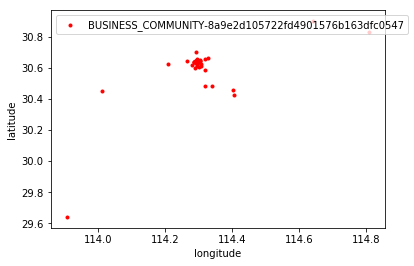

xq_code： BUSINESS_COMMUNITY-8a9e2d105722fd4901576b163dfc0547 :全部数据点： 70 个：可用数据点： 54 个：异常数据点: 16 个


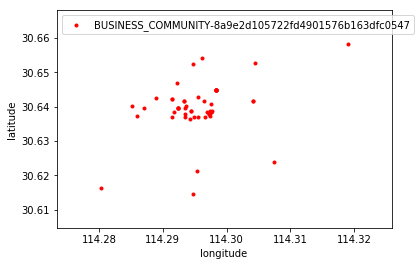

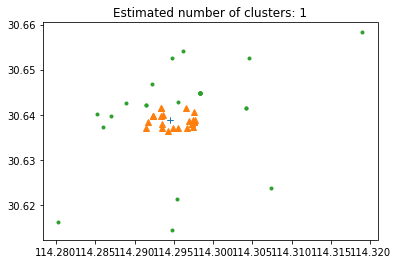

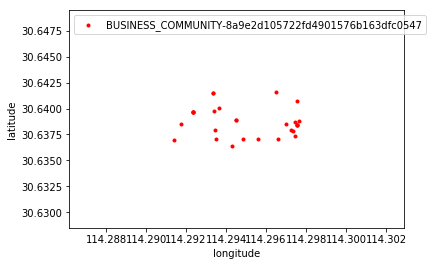

xq_code： BUSINESS_COMMUNITY-8a9e2d105722fd4901576b163dfc0547 ,计算点数量： 54 ,成员点数量： 29 ,核心点数量： 2 ,非核心点数量： 27 ,噪音点数量： 25
xq_code： BUSINESS_COMMUNITY-8a9e2d105722fd4901576b163dfc0547 114.29766570000001 114.29140559999999 30.6415976 30.63636593


In [52]:
for xq_code in xq_codes:
    if xq_code == 'BUSINESS_COMMUNITY-8a9e2d105722fd4901576b163dfc0547':
        jwd = jwddf.loc[jwddf['xq_code']==xq_code]
    
        #展示全部用户位置分布
        showAllPointImage(jwd,xq_code)
    
        #剔除异常值
        test_df = filterExcepValues(jwd,xq_code)
    
        #展示参与计算的用户的位置分布
        showCalPointImage(test_df,xq_code)

        if test_df.shape[0] != 0:
            db,n_clusters_,labels = dbscan(test_df,0.004,round(test_df.shape[0] * 0.5))

            if n_clusters_ == 1:
                core_samples_mask = np.zeros_like(labels, dtype=bool)
                #核心点
                core_samples_mask[db.core_sample_indices_] = True
                #成员点
                class_member_mask = (labels == 0)
                #噪声点
                noise_member_mask = (labels == -1)

                core_member = test_df[class_member_mask & core_samples_mask]
                non_core_member = test_df[class_member_mask & ~core_samples_mask]
                class_member = test_df[class_member_mask]
                noise_member = test_df[noise_member_mask]


                #展示簇分布
                showClusterImage(core_member,non_core_member,noise_member,n_clusters_)
                #展示成员点分布
                showMemberImage(class_member,xq_code)
                print('xq_code：',xq_code,',计算点数量：',test_df.shape[0],',成员点数量：',class_member.shape[0],',核心点数量：',core_member.shape[0],',非核心点数量：',non_core_member.shape[0],',噪音点数量：',noise_member.shape[0])
                print('xq_code：',xq_code,class_member['pre_night_longitude'].max(),class_member['pre_night_longitude'].min(),class_member['pre_night_latitude'].max(),class_member['pre_night_latitude'].min()) 

            else:
                print('xq_code：',xq_code ,'计算簇个数为',n_clusters_,'个，稍后计算！')
            
        else:
            print('xq_code：',xq_code ,':可用数据点为',test_df.shape[0],'个，稍后计算！')